# Simple

In [1]:
import statsmodels.api as sm
import pandas as pd
from sklearn import datasets 
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import numpy as np
import pandas as pd
# on utilise les éléments data et feature_names pour former un data frame des variables explicatives
df = pd.DataFrame(data.data, columns=data.feature_names)

# on créé un second data frame contenant la variable explicative
target = pd.DataFrame(data.target, columns=["MEDV"])

'''Regression linéaire simple'''
''' Sans constante'''

import statsmodels.api as sm

# On sélectionne une seule variable
X = df["RM"]
y = target["MEDV"]

In [3]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          3.74e-256
Time:                        00:55:20   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

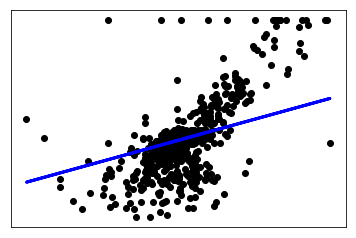

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='black')
plt.plot(X, predictions, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [5]:
''' Modèle avec constante '''
import statsmodels.api as sm # on importe statsmodels

X = df["RM"] # on choisit la variable explicative
y = target["MEDV"] # on définit la variable cible
X = sm.add_constant(X) # et on ajoute une colonne constante égale à 1

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        00:55:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

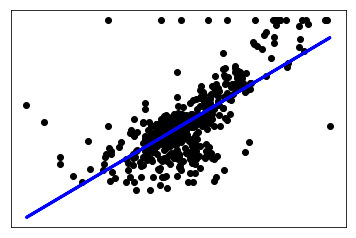

In [6]:
# Visualisation graphique
import matplotlib.pyplot as plt
plt.scatter(X['RM'], y,  color='black')
plt.plot(X['RM'], predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Multiple 

In [7]:
X = df[["RM", "CRIM"]] # on choisit les variables explicatives
y = target["MEDV"] # on définit la variable cible

# On prépare la normalisation des variables explicatives
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

model = sm.OLS(y, X).fit() # on applique le modèle
predictions = model.predict(X) # on calcule les prédicitons
model.summary() # on visualise les statistiques

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           1.58e-09
Time:                        00:55:20   Log-Likelihood:                -2312.7
No. Observations:                 506   AIC:                             4629.
Df Residuals:                     504   BIC:                             4638.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.8899      1.067      5.519      0.000       3.793       7.987
x2            -2.2764      1.067     -2.133      0.033      -4.373      -0.180
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         1.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#sklearn version
from sklearn import linear_model
X = df[["RM", "CRIM"]]
y = target['MEDV']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)
print("R^2 Sklearn : ",lm.score(X,y))

R^2 Sklearn :  0.5419591738494083
